# データ分析演習 week05 演習課題
- 氏名：<氏名に置き換えてください>
- 学生番号：<学生番号に置き換えてください>

## はじめに
1. このファイルの名前の(JBxxxxxx)を自分の学生番号にしてください．
2. 上記の氏名と学生番号を忘れずに記入してください．

## 提出方法
- GitHub Desktopを通じてGitHubへ提出
- 締切: **6月4日（木）**
  - 教科書が準備できていない人もいるかもしれませんので，6月11日（木） 14:30までの提出は減点しませんが，できる限り早い段階で提出してください．締め切りに間に合わなかった人も諦めずに提出してください．

## この演習資料の進め方
1. 教科書「東京大学のデータサインティスト育成講座」 ch2.1（2章1節）〜ch2.3（2章3節），および教科書サポートページからダウンロードしたノートブック（Chapter2.ipynbの2.1から2.3）を一通り学習してください
 - サポートサイト: https://book.mynavi.jp/supportsite/detail/9784839965259.html
 - パスワードは書籍に記載してあります．
2. その後，教科書およびこの資料前半の補足を参考にしながら以下の演習課題を解いてください
 - なんかよく分からないエラーが起こったら，一旦Jupyter notebookのメニューの Kernel -> Restart & Clear Outputを実行し一回初期化して，再度上からセルを実行すると解決することもあります．
---

まずは，この演習で使うモジュールをインポートしておきます．インポートについては，教科書ch2.1〜を参照してください．

In [1]:
import numpy as np # numpyモジュールを np という識別名でインポート
from scipy import linalg # scipyのなかの線形代数用のモジュールをインポート
from numpy import random # numpyが提供する random というモジュールを， random.choice みたいな形でアクセスできるようにする

In [2]:
# numpyなどの出力を小数第3位まで表示
%precision 3

'%.3f'

# 教科書の補足
本演習と関連するところを補足しておきます．

## np.array (ndarray) に対する各種統計量の計算（ch.2.2.2)
教科書に記載されている `max`, `min`, `sum`, `cumsum`などの他にも 以下の関数などがあります
- `mean` 平均
- `var` 分散
  - ただし，標準で（不偏分散ではない）標本分散が求まります
  - 標本不偏分散を求める場合は `var(ddof=1)` と指定する必要があります

In [3]:
x = np.array([1, 2, 3, 4, 10]) # numpyの配列を作成 （要素を5つ持つベクトルと考えても良いです）
print('平均 =',x.mean()) # x の平均を表示
print('標本分散 =', x.var())
print('不偏分散 =', x.var(ddof=1))

平均 = 4.0
標本分散 = 10.0
不偏分散 = 12.5


（参考・興味のある人むけ）なお， np.array で作成した配列は`ndarray`という型になっています． Pythonでは `type()` と打つことで変数の型を知ることができます．
 - ndarray という名前は多次元配列（n-dimensional array) から来ています． $n=1$のとき1次元配列（つまり，ベクトルと思えば良い）， $n=2$のとき2次元配列（つまり，行列と思えば良い）になります．

In [30]:
print(type(x)) # x の型はなに？
print(type(10)) # 10 の型はなに？
print(type(10.0)) # 10.0 の型はなに？
print(type('10')) # '10' の型はなに？

<class 'float'>
<class 'int'>
<class 'float'>
<class 'str'>


### 行列の作成方法 (ch.2.2.4)
教科書に書いてある，`np.arange`や`np.zeros`, `np.ones` のように関数を用いて行列を作成するほかに，数値の配列（正確には， 行列の場合は配列の配列）を直接 `np.array` に渡すことで行列やベクトルを作成することもできます．たとえば，
 
$$
  \mathbf{A} = \left(
    \begin{array}{rrr}
     1 & 2 & 3 \\
      4 & 5 & 6 \\
      7 & 8 & 9
    \end{array}
  \right) ,
    \mathbf{B} = \left(
    \begin{array}{rr}
      1 & 2  \\
      3 & 4  \\
      5 & 6 
    \end{array}
  \right) , 
    \mathbf{c} = \left(
    \begin{array}{rrr}
      2 \\
      2 \\
      2
    \end{array}
  \right)
$$
といった行列・ベクトルはそれぞれ，以下の様にして作成できます．

In [5]:
# 行列Aを作成（[]の数に注意しながらみてください）
A = np.array(
    [[1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]]
)
A # 変数 A を表示

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [6]:
# 行列Bを作成（[]の数に注意しながらみてください）
B = np.array(
    [[1, 2],
    [3, 4],
    [5, 6]]
)
B # 変数 B を表示

array([[1, 2],
       [3, 4],
       [5, 6]])

In [7]:
# ベクトルcを作成
c = np.array(
    [2,2,2]
)
c # 変数 c を表示

array([2, 2, 2])

なお，これらの行列 $\mathbf{A}, \mathbf{B}$， ベクトル $\mathbf{c}$ は `np.arange`や`np.ones`を用いても作成できます（ch.2.2.4)．

In [8]:
print('A =', np.arange(9).reshape(3,3)+1) # +1 がないとき結果がどうなるか確認してみてください
print('B =', np.arange(6).reshape(3,2)+1)
print('c =', np.ones(3)*2)  #*2 を *3 や *4 にかえるとどうなるか確認してみてください．

A = [[1 2 3]
 [4 5 6]
 [7 8 9]]
B = [[1 2]
 [3 4]
 [5 6]]
c = [2. 2. 2.]


 numpyでのnp.arrayに対する要素や行のアクセスについて触れておきます (ch.2.2.4にもありますが，大事なところなので繰り返しておきます）

In [9]:
A[0,0] # Aの1行1列目の要素 （Pythonは添え字は0始まり）

1

In [10]:
A[1] # Aの2行目 A[1, : ] でも同じ結果

array([4, 5, 6])

In [11]:
A[:, 1] # Aの2列目

array([2, 5, 8])

In [12]:
A[0:2] # A の1行目〜2行目

array([[1, 2, 3],
       [4, 5, 6]])

In [13]:
A[0:2, 0] # A の1行目〜2行目 の　さらに1列目

array([1, 4])

In [14]:
A[0:2, 1:3] # A の1行目〜2行目 の　さらに2列目〜3列目

array([[2, 3],
       [5, 6]])

### 行列の形の確認(ch.2.2.2)
`ndim`でndarrayの次元数，`size`で要素数が分かりますが，他にもよく使う関数として`shape`があります．これは，ndarrayのかたち（ざっくりいうと，何行何列か）を表します．

In [15]:
print(A.ndim) #次元数　（Aは行列なので2）
print(A.size) #要素数
print(A.shape) #形状（行, 列）

2
9
(3, 3)


In [16]:
print(B.ndim) #次元数
print(B.size) #要素数
print(B.shape) #形状（行, 列）

2
6
(3, 2)


In [17]:
print(c.ndim) #次元数
print(c.size) #要素数
print(c.shape) #形状（行, 列） #ベクトルなので，行のところだけ値をもつ

1
3
(3,)


## ここから演習課題

### 課題1 (乱数） 教科書 ch.2.2.2-2.2.3

課題 1-1. 標準正規分布（平均0，分散1の正規分布）に従う乱数を100個作成し 変数 x に代入し， x を表示せよ

In [18]:
x = random.randn(100) # 標準正規分布（平均0，分散1）に従う乱数を100個作成しxに代入 (ch.2.2.3)
x # x を表示 （このセルを実行する度にxの中身が変わることを確認してみてください）

array([-0.031, -0.144, -0.021,  1.948, -0.894, -0.356, -2.038,  0.341,
       -0.348, -0.817, -0.872,  0.58 , -0.033,  1.626, -0.407, -0.643,
        0.518, -0.635, -2.048, -1.239,  0.135, -0.842, -1.197, -0.19 ,
       -0.407,  0.445,  0.542, -0.264, -1.115,  0.651, -0.341,  0.571,
       -0.515,  0.05 , -1.816,  1.676,  0.969,  1.242, -0.257, -0.671,
        0.845, -0.972,  0.967,  1.257, -1.086,  0.033, -0.847, -1.316,
       -0.47 , -0.805,  0.351,  0.521,  0.193,  0.142,  0.937,  1.938,
       -0.927, -1.828, -1.185, -0.818, -0.255, -0.377, -1.163,  1.062,
       -1.071, -0.433,  2.219, -1.313, -1.595, -0.074, -1.579, -2.132,
        0.443, -0.06 , -0.068,  0.87 ,  1.201, -1.049,  0.17 ,  0.048,
        0.815, -0.88 ,  0.751, -1.048,  0.243,  1.797, -0.955, -0.155,
        1.187, -1.835, -0.133,  2.646,  0.987, -0.05 ,  1.024,  0.662,
        0.214,  0.748, -0.88 , -0.75 ])

課題 1-2. x の最大値，最小値， 平均，標本分散，標本不偏分散を表示せよ

In [19]:
print('xの最大値 =',x.max()) #最大値を表示 
print('xの最小値 =',x.min()) #最小値を表示
print('xの平均 =',x.mean()) #平均を表示
print('xの標本分散 =',x.var()) #標本分散を表示
print('xの標本不偏分散 =',x.var(ddof=1)) #標本不偏分散を表示

xの最大値 = 2.645599705714265
xの最小値 = -2.1323891546939016
xの平均 = -0.10686476068146727
xの標本分散 = 1.011392478492086
xの標本不偏分散 = 1.0216085641334203


小数点第3位以降も表示されたと思いますが，正常な動作です．

さて，今回の演習課題とは関係ありませんが，xのヒストグラムについても可視化してみます．可視化にはmatplotlibというモジュールを利用します．matplotlibの使い方は再来週以降扱う予定です．

以下の2つのセルを実行してみましょう．xのヒストグラムが表示されると思います．

In [20]:
import matplotlib.pyplot as plt #matplotlibモジュールのpyplotモジュールを plt という識別名でインポート

# ノートブック上に図を表示するためのマジックコマンド
%matplotlib inline

(array([ 6.,  7., 19., 15., 20., 11., 13.,  4.,  3.,  2.]),
 array([-2.132, -1.655, -1.177, -0.699, -0.221,  0.257,  0.734,  1.212,
         1.69 ,  2.168,  2.646]),
 <a list of 10 Patch objects>)

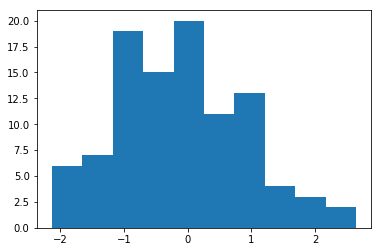

In [21]:
plt.hist(x) #xのヒストグラムを表示

課題 1-3. 'pen', 'pineapple', 'apple', 'pen' という4つの要素を含んだ np.array の変数 ppap から，復元抽出で4つ要素を無作為に抽出しxに代入せよ

In [22]:
ppap = np.array(['pen', 'pineapple', 'apple', 'pen'], dtype=np.object) # 配列を作成しppapに代入 dtype=以降は気にしないでください
x = random.choice(ppap, 4) # 配列ppapから無作為復元抽出で要素を4個抽出しxに代入  (ch.2.2.3)
x #xを表示． このセルを実行するたびに結果が変わることを確認してみてください．

array(['pineapple', 'pen', 'pineapple', 'pineapple'], dtype=object)

課題 1-4. 今度は配列 ppap から非復元抽出で4つ要素を抽出しxに代入せよ

In [23]:
x = random.choice(ppap, 4, replace=False) # 配列ppapから非復元抽出で要素を4個抽出しxに代入  (ch.2.2.3)
x #xを表示． なお，ちょうど pen pineapple apple pen と並ぶ確率は 1/12 だと思います．

array(['apple', 'pen', 'pineapple', 'pen'], dtype=object)

### 課題2 (行列の各種演算) ch.2.2.4 - 2.3.2

以下に示す$3\times3$の行列 $A$ とベクトル $\mathbf{b} $について考える
$$
  \mathbf{A} = \left[
    \begin{array}{rrr}
      -1 & 2 & -1 \\
      3 & -4 & 2 \\
      2 & 5 & -3
    \end{array}
  \right] , 
  \mathbf{b} = \left(
    \begin{array}{c}
      1 \\
      0 \\
     1
    \end{array}
  \right)
$$

課題 2-1. 上記行列 $A$ とベクトル $\mathbf{b} $を`np.array`で作成し，変数`A`と変数`b`にそれぞれ代入せよ

In [24]:
A = np.array([
    [-1, 2, -1],
    [3, -4, 2],
    [2, 5, -3]
])  # Aにnp.arrayで行列を作成し代入  (この資料の補足参照)
A # Aを表示

array([[-1,  2, -1],
       [ 3, -4,  2],
       [ 2,  5, -3]])

In [25]:
b = np.array([1, 0, 1]) # b　に np.array でベクトルを作成し代入 (ch.2.2.2)
b # bを表示

array([1, 0, 1])

正しく定義できていれば，以下のような出力がそれぞれ得られます．

課題 2.2 行列$\mathbf{A}$とベクトル$\mathbf{b}$の積 $\mathbf{A}\mathbf{b}$を表示せよ

In [26]:
x = np.dot(A, b) #変数 x に A と bの積を代入 (ch.2.2.4)
x # x を表示

array([-2,  5, -1])

課題 2-3. 行列$\mathbf{A}$の行列式$|\mathbf{A}|$を表示せよ

In [27]:
x = linalg.det(A)# 変数xに行列Aの行列式を代入 (ch.2.3.2)
x # xの中身を表示

1.000

課題 2-4. $\mathbf{A}$の逆行列$\mathbf{A}^{-1}$をもとめ， 変数`A_inv`に代入せよ

In [28]:
A_inv = linalg.inv(A) #行列Aの逆行列を変数A_invに代入 (ch.2.3.2)
A_inv #A_invの中身を表示

array([[ 2.000e+00,  1.000e+00, -2.776e-17],
       [ 1.300e+01,  5.000e+00, -1.000e+00],
       [ 2.300e+01,  9.000e+00, -2.000e+00]])

課題 2-5. 行列$\mathbf{A}$と逆行列$\mathbf{A}^{-1}$の積が単位行列になること，すなわち$\mathbf{A}\mathbf{A}^{-1}=\mathbf{I}$ となることを確認せよ

In [29]:
X = np.dot(A, A_inv)# 変数 X に𝐀と𝐀の逆行列の積の結果を代入
X # Xを表示

array([[ 1.000e+00,  0.000e+00,  0.000e+00],
       [ 0.000e+00,  1.000e+00,  0.000e+00],
       [-7.105e-15, -1.776e-15,  1.000e+00]])

正しく計算できていれば，以下の様な出力が得られます．

ここで表示される `1.000e+00`や`-7.105e-15`のような数字は， 指数表記とよばれる表記で，主に計算機で非常に大きな数や非常に小さな数を表示するときに用いられます．ここで，`-7.105e-15`とは$-7.105\times 10^{-15}$を意味しています．

行列とその逆行列との積は単位行列となるはずですが，実際に計算機で計算する場合は，浮動小数点の精度の問題で非常に小さな値（たとえば，`-7.105e-15`は$-7.105\times10^{-15}$なので，限りなく0に近い値）が誤差として残ることが往々にしてあります．

なお，`1.000e+00`は$1.000\times10^0$のことで，つまり1です． Ｘの表示結果から分かるように，対角成分が1になっていることが分かります．ただし，今回は小数点第3位まで表示するようにしているため，実際には$1.0000000000000\cdots$ではなく，小さな誤差を含んでいる場合があります．興味があれば，`X[0,0]`，`X[1,1]`，`X[2,2]`を表示してみるとよいでしょう．